# Exercise 3

Some web scraping and graph stuff

- Scrape links of Wikipedia
- Sort them in a graph

In [1]:
import os
os.system('mkdir -p build')

0

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

import networkx as nx

import numpy as np
import matplotlib.pyplot as plt

In [3]:
max_nodes = 100

def get_links_wikipedia(name):
    urlstart = 'https://en.wikipedia.org/wiki/'
    link = urlstart + name
    html = urlopen(link).read()
    soup = BeautifulSoup(html, "html.parser")
    links = []
    
    for link in soup.find_all('a', href=True):
        if link['href'][0] != '/': # sort out internal links
            continue
        if not link['href'].startswith('/wiki/'):
            continue
        # sort out some other key words for functional pages
        if 'File:' in link['href']:
            continue
        if 'Category:' in link['href']:
            continue
        if 'Wikipedia:' in link['href']:
            continue
        if 'Special:' in link['href']:
            continue
        if 'Help:' in link['href']:
            continue
        if 'Portal:' in link['href']:
            continue
        if 'Talk:' in link['href']:
            continue
        if 'Main_Page' in link['href']:
            continue
        if 'Template' in link['href']:
            continue
        links.append(link['href'][6:]) #remove /wiki/
    return links

## Inserts the name into the graph and looks up all the links on the wikipedia article
## returns the graph and list of newly inserted node names
def insert_link(graph, name):
    #if name in graph.nodes:
    #    graph
    #    return graph, []
    
    if len(graph.nodes) >= max_nodes:
        return graph, []
    
    new_links = get_links_wikipedia(name)
    existing_links = graph.nodes

    #if len(existing_links) + len(new_links) >= max_nodes: # check if all the new nodes have space
    #    return graph, []
    
    new_inserted = []
    for link in new_links:
        if link not in graph.nodes:
            graph.add_node(link)
            new_inserted.append(link)
        graph.add_edge(name, link)
    
    return graph, new_inserted


def create_graph(start):
    i = 0
    counter = 1
    look_up = []
    graph = nx.Graph()

    graph, new_links = insert_link(graph, start)
    look_up = look_up + new_links
    #return graph,look_up
    
    while len(look_up) < max_nodes:
        new_links = []
        try:
            graph, new_links = insert_link(graph, look_up[i])
        except IndexError:
            print(i)
            return graph, look_up
        except URLError:
            return graph, look_up

        look_up = look_up + new_links
        if len(new_links) > 0:
            print(f'Found {len(new_links)} new links at {look_up[i]}. Total {len(look_up)} after scraping {i} links.')
        else:
            print(f'Found  no new links at {look_up[i]}.')
            
        i += 1

    return graph, look_up

# creates a graph with nodes from a specific start point 
# does not create edges
def create_nodes(start, max_nodes=1000):
    pages = [start]
    i = 0
    while len(pages) < 3 * max_nodes:
        new_pages = get_links_wikipedia(pages[i])
        pages = pages + new_pages
        i += 1
    pages = pages
    G = nx.Graph()
    i = 0
    while len(G.nodes) < max_nodes:
        G.add_node(pages[i])
        i += 1
    return G

def create_edges(graph):
    for node in graph.nodes:
        links = get_links_wikipedia(node)
        edges_added = 0
        for link in links:
            if link in graph.nodes:
                graph.add_edge(node, link)
                edges_added += 1
        print(f'Added {edges_added} edges to node {node}')

In [4]:
graph = create_nodes('Technical_University_of_Dortmund', max_nodes=400)
create_edges(graph)

Added 224 edges to node Technical_University_of_Dortmund
Added 233 edges to node Public_university
Added 24 edges to node Rector_(academia)
Added 84 edges to node Dortmund
Added 60 edges to node North_Rhine-Westphalia
Added 147 edges to node Germany
Added 70 edges to node Urban_area
Added 7 edges to node Suburb
Added 38 edges to node German_language
Added 33 edges to node University
Added 38 edges to node Ruhr_area
Added 54 edges to node Europe
Added 13 edges to node Physics
Added 17 edges to node Electrical_engineering
Added 9 edges to node Chemistry
Added 14 edges to node Economics
Added 2 edges to node Support-vector_machine
Added 3 edges to node RapidMiner
Added 15 edges to node Natural_science
Added 36 edges to node Engineering
Added 9 edges to node Pedagogy
Added 8 edges to node Special_education
Added 12 edges to node Journalism
Added 2 edges to node Federation_of_International_Robot-soccer_Association
Added 173 edges to node Ruhr_University_Bochum
Added 168 edges to node Univer

In [5]:
p = nx.spring_layout(graph)

In [6]:
pos = np.array(list(p.values()))
labels = list(p.keys())

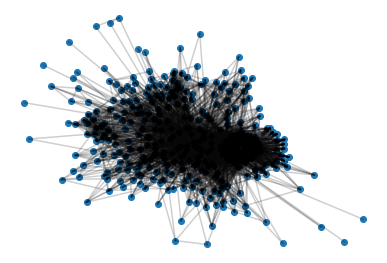

In [7]:
# draw edges
for label in labels:
    x0, y0 = p[label]
    for neighbour in list(graph[label]):
        x1, y1 = p[neighbour]
        plt.plot([x0,x1], [y0, y1],
                color='k',
                alpha=.1)

# draw nodes
plt.scatter(pos[:,0], pos[:,1])
plt.tight_layout()
plt.axis('off')

plt.savefig('build/Ex3-network_graph.pdf')

In [8]:
neighbours = [len(list(graph[label])) for label in labels]    

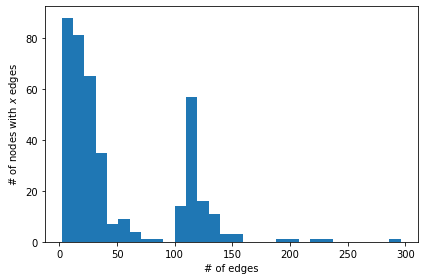

In [9]:
plt.clf()
plt.hist(neighbours, bins=30)
plt.xlabel('# of edges')
plt.ylabel(r'# of nodes with $x$ edges')
plt.tight_layout()
plt.savefig('build/Ex3-edges.pdf')